<a href="https://colab.research.google.com/github/DebershiMitra/Deep_learning-Projects/blob/main/Customer_Churn_Predictions_by_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [237]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [238]:
df = pd.read_csv("Churn_Modelling.csv")

In [239]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [240]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [241]:
df.shape

(10000, 14)

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [243]:
df.duplicated().sum()

0

In [244]:
df["Exited"].value_counts() #bit_of_imbalance_classification

0    7963
1    2037
Name: Exited, dtype: int64

In [245]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [246]:
df["Age"].value_counts()


37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

In [247]:
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [248]:
df.drop(columns = ["RowNumber","CustomerId","Surname"], inplace = True)

In [249]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [250]:
df = pd.get_dummies(df,columns =['Geography','Gender'])

In [251]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [252]:
#scalling is very important before model building in neural networks.\
#The value of weights will not converge due to some very high value and some value like binary here.
#so make sure whenever you are working with neural networks scale your values.



In [253]:
X= df.drop(columns=['Exited'])
y = df['Exited']

In [254]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2, random_state = 1)

In [255]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


In [256]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [257]:
X_train.shape

(8000, 13)

In [258]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [259]:
X_train_scaled #2d array and each customer data is scaler now

array([[-0.23082038, -0.94449979, -0.70174202, ..., -0.57273139,
        -0.91509065,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.57273139,
         1.09278791, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ..., -0.57273139,
         1.09278791, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.57273139,
         1.09278791, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.57273139,
         1.09278791, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ..., -0.57273139,
        -0.91509065,  0.91509065]])

In [260]:
X_test_scaled

array([[-1.03768121,  0.77498705, -1.0482813 , ..., -0.57273139,
        -0.91509065,  0.91509065],
       [ 0.30708683, -0.46686456, -0.70174202, ..., -0.57273139,
        -0.91509065,  0.91509065],
       [-1.23422423,  0.29735181, -1.0482813 , ..., -0.57273139,
         1.09278791, -1.09278791],
       ...,
       [-0.86182692, -0.46686456,  1.72403288, ...,  1.74601919,
        -0.91509065,  0.91509065],
       [-0.30323097, -0.84897275, -1.0482813 , ..., -0.57273139,
         1.09278791, -1.09278791],
       [ 0.04847759,  1.25262228,  1.3774936 , ..., -0.57273139,
        -0.91509065,  0.91509065]])

In [261]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

we can build 2 types of models using keras


*   sequential
*   non-sequential

Once your object is created you add layers. Here,in this case input layer, hidden layer, output layer.


1.   For hidden layer are we addoing 3 perceptrons.
2.   List item




In [262]:
model = Sequential()

model.add(Dense(5, activation = 'relu', input_dim = 13))
model.add(Dense(11, activation = 'relu'))
model.add(Dense(1,activation= 'sigmoid'))

In [263]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 5)                 70        
                                                                 
 dense_20 (Dense)            (None, 11)                66        
                                                                 
 dense_21 (Dense)            (None, 1)                 12        
                                                                 
Total params: 148 (592.00 Byte)
Trainable params: 148 (592.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [264]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [265]:
history = model.fit(X_train_scaled, y_train, epochs= 50, validation_split = 0.2)

Epoch 1/50
200/200 [==============================] - 1s 4ms/step - loss: 0.5455 - accuracy: 0.7878 - val_loss: 0.5115 - val_accuracy: 0.7975
Epoch 2/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4869 - accuracy: 0.7972 - val_loss: 0.4792 - val_accuracy: 0.7975
Epoch 3/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4634 - accuracy: 0.7972 - val_loss: 0.4602 - val_accuracy: 0.7975
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4476 - accuracy: 0.7972 - val_loss: 0.4462 - val_accuracy: 0.7975
Epoch 5/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4374 - accuracy: 0.7967 - val_loss: 0.4374 - val_accuracy: 0.8019
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4310 - accuracy: 0.8066 - val_loss: 0.4323 - val_accuracy: 0.8062
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4269 - accuracy: 0.8109 - val_loss: 0.4288 - val_accuracy: 0.8075
Epoch 

In [266]:
model.layers[1].get_weights()

[array([[ 0.00443398, -0.2436165 , -0.24163774,  0.11679536,  0.08466969,
          0.5593349 ,  0.10535715,  0.6649308 , -0.61126   , -0.92138577,
          0.5997941 ],
        [ 0.02456308,  0.3184438 , -0.21581344, -0.09888354,  0.6812974 ,
          0.15284654, -0.80539083,  0.08655707, -0.6426087 , -0.14991033,
          0.47046956],
        [-0.6206118 ,  0.32100478, -0.5964155 ,  0.18916152, -0.8290484 ,
          0.6617181 ,  0.29552475, -0.33970284, -0.21124543, -0.43876648,
         -0.03536306],
        [-0.4639728 ,  0.8378966 ,  0.5081446 , -0.5394919 , -0.08273754,
         -0.6363791 ,  0.7665278 ,  0.09907476, -0.16864468, -0.1920616 ,
         -0.2409797 ],
        [-1.0057868 ,  0.40873638, -0.5393087 ,  0.84327585, -0.22791989,
          0.17645153, -1.2236162 , -0.01704974,  0.3106064 ,  0.32387987,
          0.93972796]], dtype=float32),
 array([ 0.53402233, -0.40016392,  0.84726286,  0.09677236,  0.226853  ,
         0.0104347 ,  0.8123756 , -0.00152631, -0.23741

In [267]:
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 2ms/step


In [268]:
y_pred = np.where(y_log > 0.5, 1,0)

In [269]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8615

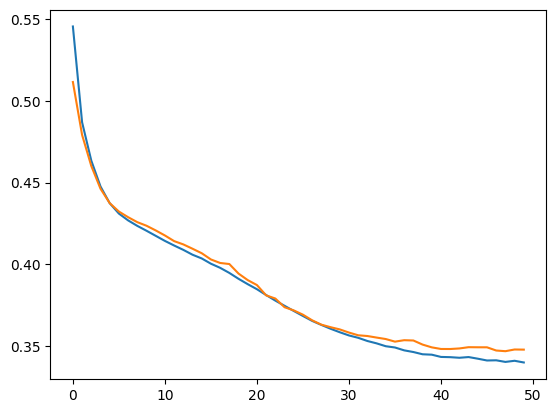

In [270]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

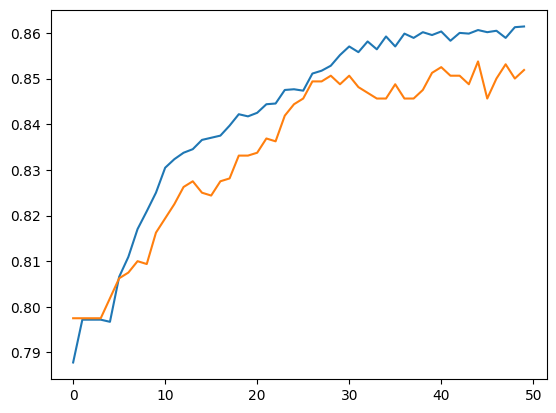

In [272]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])